In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataum = pd.read_csv('ex1data2.txt', header=None)
dataum.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2]:
dataum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
0    47 non-null int64
1    47 non-null int64
2    47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


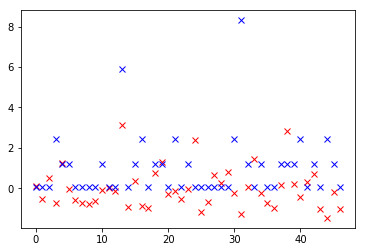

In [3]:
col1 = dataum[0].values
col2 = dataum[1].values
col3 = dataum[2].values
col1 = (col1 - np.mean(col1)) / np.std(col1)
col2 = (col2 - np.mean(col2)) / np.std(col2)
plt.plot(col1,'rx',col2*col2,'bx')

In [4]:
data = list(zip(col1, col2, col3))

n_samples = len(data)

data = np.asarray(data,dtype=np.float32)

In [5]:
import tensorflow as tf

X1 = tf.placeholder(tf.float32, name="X0")

X2 = tf.placeholder(tf.float32, name="X1")


In [6]:
Y = tf.placeholder(tf.float32,name = "Y")

theta_0 = tf.get_variable('theta_0', initializer = tf.constant(0.0))
theta_1 = tf.get_variable('theta_1', initializer = tf.constant(0.0))
theta_2 = tf.get_variable('theta_2', initializer = tf.constant(0.0))

In [7]:
Y_predicted = theta_0 + X1 * theta_1 + X2*theta_2

In [8]:
loss = tf.square(Y - Y_predicted, name='loss')

opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

optimizer = opt.minimize(loss)

In [9]:

with tf.Session() as sess:
    # Initializer
    sess.run(tf.global_variables_initializer())
    
    for i in range(400):
        for x1,x2,y in data:
            sess.run(optimizer, feed_dict={X1: x1,X2: x2, Y: y})
    
    # theta saving in variable
    theta_0,theta_1,theta_2 = sess.run([theta_0,theta_1,theta_2])

In [10]:
print theta_0, theta_1, theta_2

332479.0 98170.8 4327.72


In [11]:
result = theta_0 + 1650*theta_1 + 3*theta_2 
print result

162327212.699
